<a href="https://colab.research.google.com/github/mirozy13/Machine-learning/blob/main/powerlifting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
np.random.seed(2023)

In [ ]:
from google.colab import output
!wget https://gist.githubusercontent.com/Yegorov/dc61c42aa4e89e139cd8248f59af6b3e/raw/20ac954e202fe6a038c2b4bb476703c02fe0df87/ya.py
!chmod +x ya.py
!./ya.py https://disk.yandex.ru/d/2QBkfBsLyFt5Gw
!unzip powerlifting.zip
output.clear()

In [ ]:
import pandas as pd
df = pd.read_csv("openpowerlifting.csv")

<ipython-input-80-5dd7a280c033>:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("openpowerlifting.csv")


In [ ]:
df.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
       'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'McCulloch', 'Glossbrenner', 'IPFPoints', 'Tested', 'Country',
       'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName'],
      dtype='object')

In [ ]:
df.head(10)

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
5,April Alvarez,F,SBD,Wraps,37.0,35-39,F-OR,74.0,75,127.5,...,354.74,312.20,596.18,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
6,Ash Morgan,F,SBD,Wraps,23.0,20-23,F-OR,59.8,60,115.0,...,385.63,340.74,612.23,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
7,Belinda Moloney,F,SBD,Wraps,35.0,35-39,F-OR,80.4,82.5,120.0,...,337.62,296.00,575.85,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
8,Briony Williams,F,SBD,Wraps,36.0,35-39,F-OR,108.0,110,180.0,...,424.49,361.57,716.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
9,Brooke Kowalczyk,F,SBD,Wraps,37.0,35-39,F-OR,74.8,75,180.0,...,452.31,397.92,762.42,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [ ]:
df.shape

(1423354, 37)

Text(0.5, 1.0, 'Гендерное соотношение')

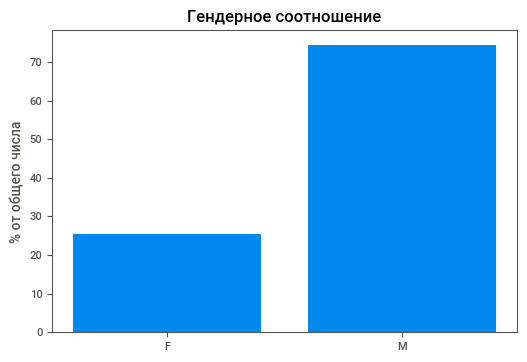

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
genders = np.unique(df['Sex'], return_counts=True)
genders_ratios = genders[1] / np.sum(genders[1]) * 100
plt.bar(genders[0], genders_ratios)
plt.ylabel("% от общего числа")
plt.title("Гендерное соотношение")

In [ ]:
# соревнования для женщин
df = df[df['Sex'] =='F']

In [ ]:
df[:10]

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
5,April Alvarez,F,SBD,Wraps,37.0,35-39,F-OR,74.0,75,127.5,...,354.74,312.20,596.18,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
6,Ash Morgan,F,SBD,Wraps,23.0,20-23,F-OR,59.8,60,115.0,...,385.63,340.74,612.23,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
7,Belinda Moloney,F,SBD,Wraps,35.0,35-39,F-OR,80.4,82.5,120.0,...,337.62,296.00,575.85,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
8,Briony Williams,F,SBD,Wraps,36.0,35-39,F-OR,108.0,110,180.0,...,424.49,361.57,716.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
9,Brooke Kowalczyk,F,SBD,Wraps,37.0,35-39,F-OR,74.8,75,180.0,...,452.31,397.92,762.42,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363165 entries, 0 to 1423248
Data columns (total 37 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             363165 non-null  object 
 1   Sex              363165 non-null  object 
 2   Event            363165 non-null  object 
 3   Equipment        363165 non-null  object 
 4   Age              192760 non-null  float64
 5   AgeClass         197836 non-null  object 
 6   Division         361453 non-null  object 
 7   BodyweightKg     359054 non-null  float64
 8   WeightClassKg    359446 non-null  object 
 9   Squat1Kg         98473 non-null   float64
 10  Squat2Kg         97802 non-null   float64
 11  Squat3Kg         96605 non-null   float64
 12  Squat4Kg         1472 non-null    float64
 13  Best3SquatKg     285627 non-null  float64
 14  Bench1Kg         128380 non-null  float64
 15  Bench2Kg         127525 non-null  float64
 16  Bench3Kg         125733 non-null  flo

In [ ]:
df.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,IPFPoints
count,192760.000000,359054.000000,98473.000000,97802.000000,96605.000000,1472.000000,285627.000000,128380.000000,127525.000000,125733.000000,...,105365.000000,104162.000000,101980.000000,3715.000000,299340.000000,339048.000000,337032.000000,337021.000000,337032.000000,328631.000000
mean,30.624624,68.007905,76.506435,62.824510,22.572693,61.885367,113.722239,50.263324,34.083361,-8.843100,...,112.830098,98.115674,29.021149,75.514654,126.869407,264.442652,277.620578,284.505794,244.499947,473.405516
std,12.445009,17.644408,85.724741,104.888779,125.316199,127.274818,36.574329,47.173330,65.392049,76.394292,...,57.086848,93.860712,139.187515,125.477123,31.478235,110.860405,111.442054,113.651099,98.399426,110.598600
min,0.500000,15.880000,-365.000000,-453.600000,-453.600000,-300.000000,-252.500000,-240.000000,-453.600000,-575.000000,...,-300.000000,-282.500000,-305.000000,-263.000000,-190.000000,7.480000,10.150000,10.150000,8.950000,13.960000
25%,21.000000,55.700000,70.000000,60.000000,-110.000000,-68.125000,90.000000,42.500000,25.000000,-70.000000,...,100.000000,100.000000,-130.000000,80.000000,105.000000,201.850000,218.700000,223.640000,192.090000,393.315000
50%,27.500000,64.800000,97.500000,100.000000,85.000000,110.000000,110.000000,55.000000,55.000000,-47.500000,...,120.000000,125.000000,110.000000,125.000000,125.000000,272.160000,287.700000,293.600000,253.200000,460.320000
75%,38.500000,75.890000,122.500000,125.000000,122.500000,145.000000,134.000000,72.500000,72.500000,65.000000,...,140.000000,145.000000,140.000000,152.500000,145.150000,333.390000,348.180000,355.570000,306.830000,539.605000
max,97.000000,205.660000,350.000000,369.680000,365.000000,377.500000,387.500000,230.000000,242.500000,247.500000,...,285.000000,295.000000,300.000000,268.000000,315.000000,930.000000,776.170000,801.710000,682.760000,1207.480000


In [ ]:
df_regr = df[["BodyweightKg", "Age", "Equipment", "Tested", "Best3SquatKg", "Best3BenchKg", "Best3DeadliftKg"]]
df_regr.loc[df['Tested'] != 'Yes', 'Tested'] = "No"

In [ ]:
df_regr = df_regr.rename(columns={"Best3BenchKg": "bench", "Best3SquatKg": "squat", "Best3DeadliftKg": "deadlift"})

In [ ]:
df_regr.loc[df_regr['Age'] < 18, 'Age'] = -1

In [ ]:
df_regr.loc[df_regr['bench'] < 0, 'bench'] = 0
df_regr.loc[df_regr['squat'] < 0, 'squat'] = 0
df_regr.loc[df_regr['deadlift'] < 0, 'deadlift'] = 0

In [ ]:
df_regr['bench'].isna().sum()

32874

In [ ]:
df_regr = df_regr.fillna({"bench":-1, "squat":-1, "deadlift": -1, 'Age': -1, "BodyweightKg": -1})

In [ ]:
df_regr['bench'].isna().sum()

0

In [ ]:
df_regr.isna().any()

BodyweightKg    False
Age             False
Equipment       False
Tested          False
squat           False
bench           False
deadlift        False
dtype: bool

In [ ]:
df_regr['Equipment'].head(5)

0    Wraps
1    Wraps
2      Raw
3    Wraps
4    Wraps
Name: Equipment, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_regr['Equipment'] = le.fit_transform(df_regr['Equipment'])
df_regr['Tested'] = LabelEncoder().fit_transform(df_regr['Tested'])
output.clear()

In [ ]:
df_regr['Equipment'].head(5)

0    3
1    3
2    1
3    3
4    3
Name: Equipment, dtype: int64

<Figure size 800x640 with 0 Axes>

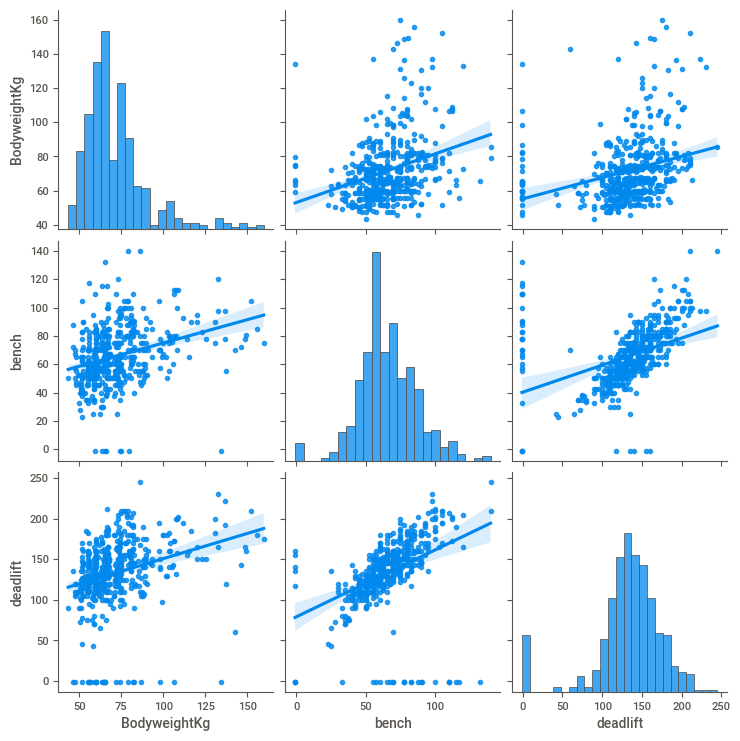

In [ ]:
import seaborn as sns 
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df_regr[["BodyweightKg", "bench", 'deadlift']][:500], kind="reg")
plt.show()

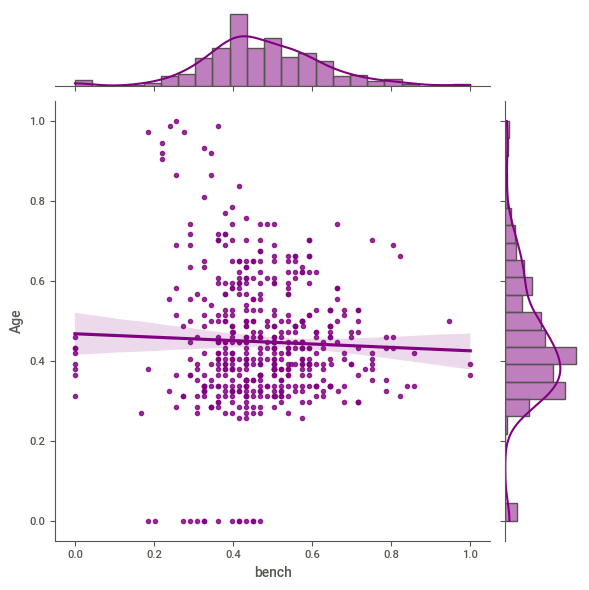

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
scaler = MinMaxScaler()
scaler.fit(df_regr[:500])
df_transform = pd.DataFrame(data=scaler.fit_transform(df_regr[:500]), columns=df_regr.columns)
sns.jointplot(data=df_transform,x='bench',y='Age',kind='reg',color="Purple")
plt.show()

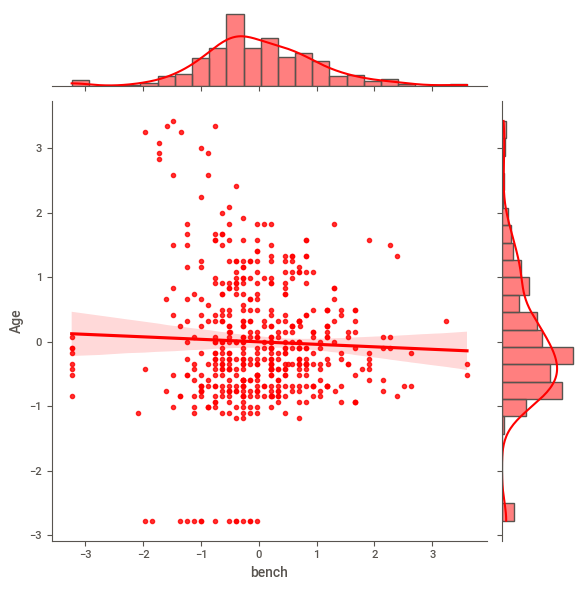

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_regr[:500])
df_transform = pd.DataFrame(data=scaler.fit_transform(df_regr[:500]), columns=df_regr.columns)
sns.jointplot(data=df_transform,x='bench',y='Age',kind='reg',color="Red")
plt.show()

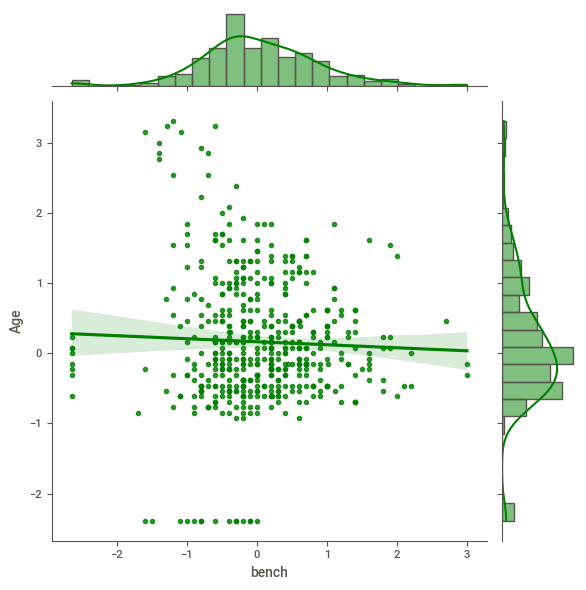

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df_regr[:500])
df_transform = pd.DataFrame(data=scaler.fit_transform(df_regr[:500]), columns=df_regr.columns)
sns.jointplot(data=df_transform,x='bench',y='Age',kind='reg',color="Green")
plt.show()

In [ ]:
# X - объясняющие, независимые переменные, предикторы, ковариаты, регрессоры
X = df_regr[[ "BodyweightKg","Age", "Equipment", "Tested", "bench", 'deadlift']].to_numpy()
# y - зависимая переменная, переменная результата, переменная отклика
y = df_regr["squat"].to_numpy()

In [ ]:
import statsmodels.api as sm
res = sm.OLS(y, X).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                          5.581e+05
Date:                Thu, 23 Mar 2023   Prob (F-statistic):                        0.00
Time:                        09:52:34   Log-Likelihood:                     -1.7864e+06
No. Observations:              363165   AIC:                                  3.573e+06
Df Residuals:                  363159   BIC:                                  3.573e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
import statsmodels.api as sm
res = sm.OLS(y, np.hstack((X, np.ones(shape=(X.shape[0],1))))).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                 1.252e+05
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        09:52:36   Log-Likelihood:            -1.7790e+06
No. Observations:              363165   AIC:                         3.558e+06
Df Residuals:                  363158   BIC:                         3.558e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0730      0.003     24.619      0.0

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import *
from sklearn.linear_model import *
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

cv = KFold(n_splits=5)
mean_acc = []
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
  X_train = X[train_index]
  X_test = X[test_index]
  y_train = y[train_index]
  y_test = y[test_index]
  scaler = RobustScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  model = LinearSVR()
  model.fit(X_train, y_train)
  acc = r2_score(y_test, model.predict(X_test))
  mean_acc.append(acc)
print(np.mean(acc))

0.5609469642508148


In [ ]:
cv = KFold(n_splits=5)
mean_acc = []
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
  X_train = X[train_index]
  X_test = X[test_index]
  y_train = y[train_index]
  y_test = y[test_index]
  scaler = RobustScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  model = LinearSVR()
  model.fit(X_train, y_train)
  acc = mean_squared_error(y_test, model.predict(X_test))
  mean_acc.append(acc)
print(np.mean(acc))

1614.3252805038671


In [ ]:
cv = KFold(n_splits=5)
mean_acc = []
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
  X_train = X[train_index]
  X_test = X[test_index]
  y_train = y[train_index]
  y_test = y[test_index]
  scaler = RobustScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  model = LinearSVR()
  model.fit(X_train, y_train)
  acc = mean_absolute_error(y_test, model.predict(X_test))
  mean_acc.append(acc)
print(np.mean(acc))

23.53689014538337


In [ ]:
cv = KFold(n_splits=5)
mean_acc = []
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
  X_train = X[train_index]
  X_test = X[test_index]
  y_train = y[train_index]
  y_test = y[test_index]
  scaler = RobustScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  model = LinearSVR()
  model.fit(X_train, y_train)
  acc = mean_absolute_percentage_error(y_test, model.predict(X_test))
  mean_acc.append(acc)
print(np.mean(acc))

13160141542747.887


In [ ]:
nsample = 100
x = np.linspace(0, 10, 100)
beta = np.array([1, 10])
X = df_regr[[ "BodyweightKg","Age", "Equipment", "Tested", "bench", 'deadlift']].to_numpy()
y = df_regr["squat"].to_numpy()


In [ ]:
model = sm.OLS(y, X)
res = model.fit()
# выводим сводку результата
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                          5.581e+05
Date:                Thu, 23 Mar 2023   Prob (F-statistic):                        0.00
Time:                        10:13:12   Log-Likelihood:                     -1.7864e+06
No. Observations:              363165   AIC:                                  3.573e+06
Df Residuals:                  363159   BIC:                                  3.573e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
print('Коэффициенты модели: ', res.params)
print('R2: ', res.rsquared)

Коэффициенты модели:  [-0.13099513 -0.54309925  6.26134824  0.25519573  0.47393292  0.66451727]
R2:  0.9021670519516424
